In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

In [3]:
from matplotlib import pyplot as plt
from torchvision import utils
def imshow(inp, save=False, title=None):
    """Imshow for Tensor."""
    fig = plt.figure(figsize=(5, 5))
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    plt.show()

In [4]:
root = './data'
download = True
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5,), (0.5,0.5,0.5))])
trans = transforms.Compose([transforms.ToTensor()])
train_set = dset.MNIST(root=root, train=True, transform=trans, download=download)
test_set = dset.MNIST(root=root, train=False, transform=trans)
batch_size = 128
kwargs = {}
train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

In [5]:
z_size=128
hidden_size=128
img_size=28

In [6]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(z_size, hidden_size),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_size, img_size**2),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = x.view(x.size()[0], z_size)
        out = self.model(x)
        out = out.view(x.size()[0], 1,img_size,img_size)
        return out

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(img_size**2, hidden_size),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        out = self.model(x.view(x.size(0), img_size**2))
        out = out.view(out.size(0), -1)
        return out

  0%|          | 0/10000 [00:00<?, ?it/s]/Users/sunxiaofei/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:767: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


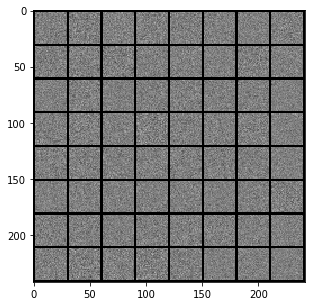

  1%|          | 100/10000 [00:08<13:53, 11.88it/s]

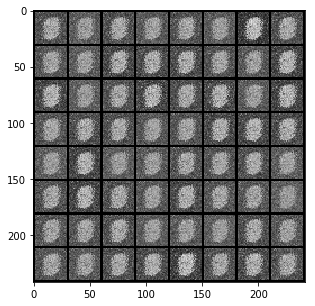

  2%|▏         | 198/10000 [00:14<12:19, 13.25it/s]

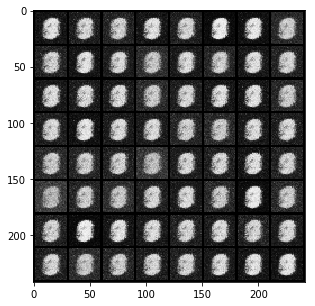

  3%|▎         | 299/10000 [00:20<11:09, 14.49it/s]

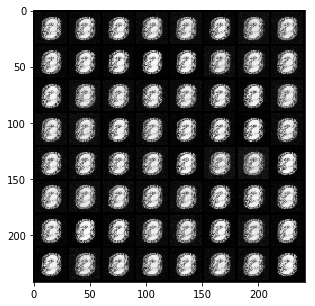

  4%|▍         | 399/10000 [00:28<11:22, 14.08it/s]

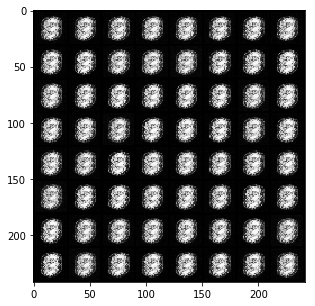

  5%|▍         | 498/10000 [00:34<11:05, 14.29it/s]

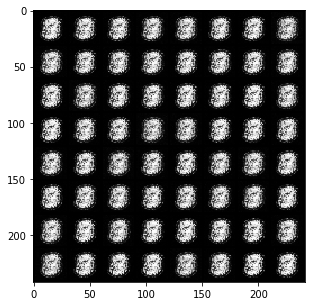

  6%|▌         | 598/10000 [00:41<10:57, 14.31it/s]

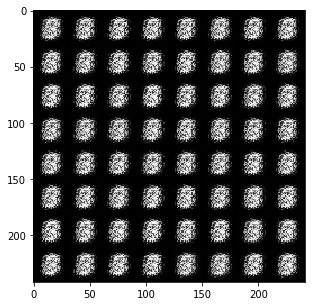

  7%|▋         | 700/10000 [00:49<10:58, 14.11it/s]

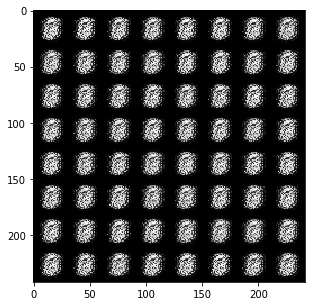

  8%|▊         | 799/10000 [00:56<10:48, 14.19it/s]

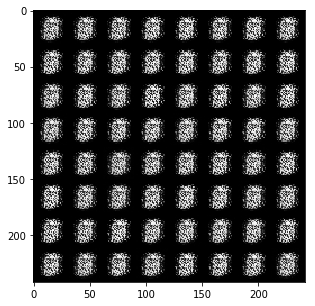

  9%|▉         | 900/10000 [01:03<10:37, 14.26it/s]

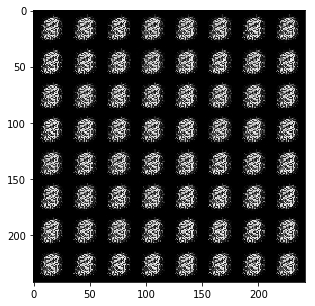

 10%|█         | 1000/10000 [01:10<10:33, 14.20it/s]

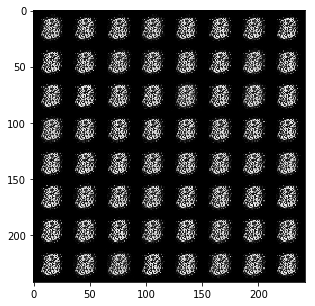

 11%|█         | 1100/10000 [01:16<10:20, 14.35it/s]

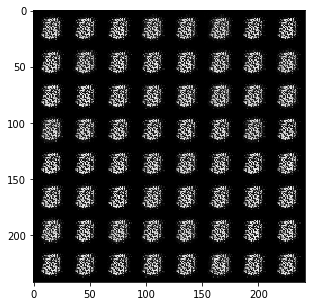

 12%|█▏        | 1200/10000 [01:23<10:09, 14.44it/s]

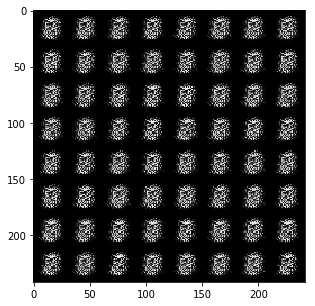

 13%|█▎        | 1300/10000 [01:29<09:58, 14.54it/s]

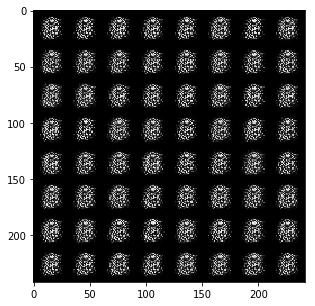

 14%|█▍        | 1399/10000 [01:35<09:48, 14.60it/s]

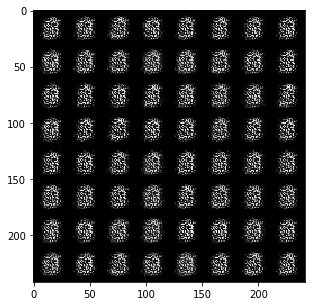

 15%|█▍        | 1498/10000 [01:42<09:41, 14.63it/s]

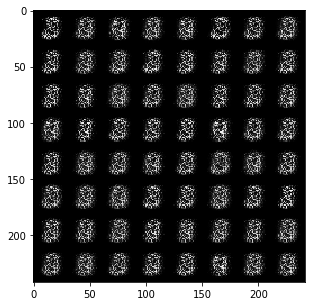

 16%|█▌        | 1599/10000 [01:49<09:32, 14.66it/s]

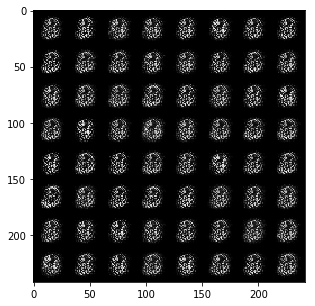

 17%|█▋        | 1700/10000 [01:57<09:32, 14.50it/s]

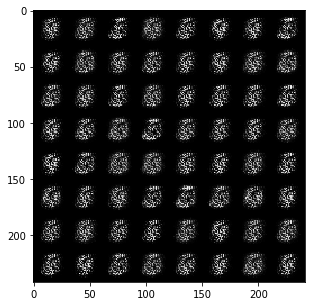

 18%|█▊        | 1800/10000 [02:03<09:21, 14.61it/s]

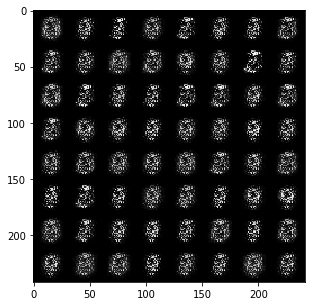

 19%|█▉        | 1900/10000 [02:10<09:16, 14.55it/s]

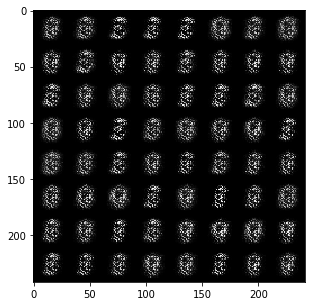

 20%|██        | 2000/10000 [02:20<09:20, 14.28it/s]

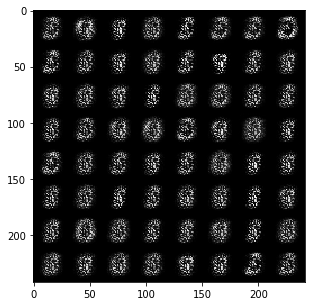

 21%|██        | 2098/10000 [02:25<09:06, 14.45it/s]

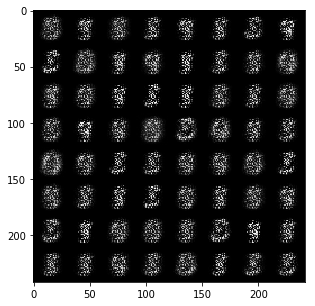

 22%|██▏       | 2198/10000 [02:30<08:55, 14.57it/s]

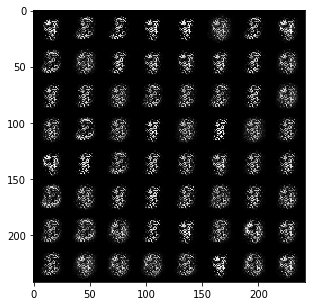

 23%|██▎       | 2300/10000 [02:36<08:42, 14.73it/s]

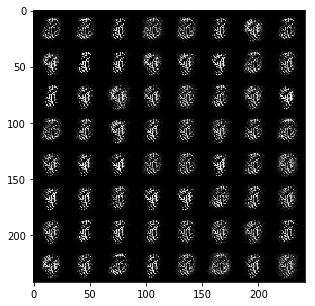

 24%|██▍       | 2399/10000 [02:41<08:32, 14.84it/s]

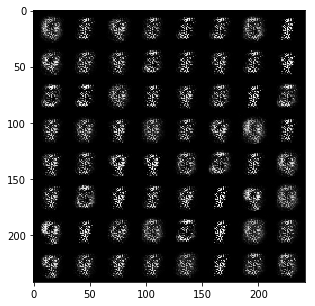

 25%|██▌       | 2500/10000 [02:47<08:21, 14.95it/s]

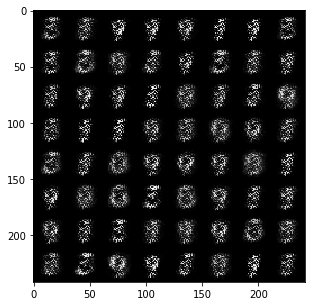

 26%|██▌       | 2598/10000 [02:55<08:20, 14.78it/s]

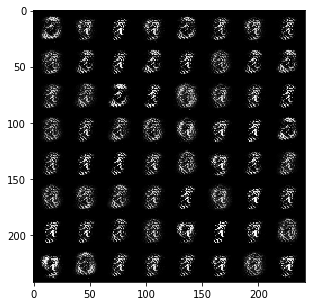

 27%|██▋       | 2700/10000 [03:02<08:13, 14.79it/s]

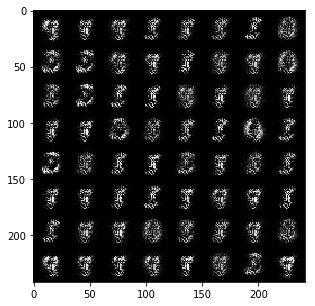

 28%|██▊       | 2799/10000 [03:09<08:08, 14.75it/s]

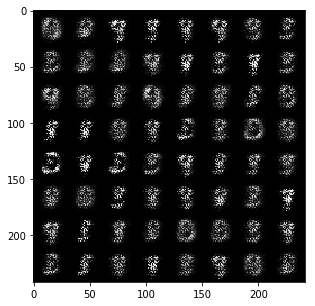

 29%|██▉       | 2900/10000 [03:16<08:01, 14.76it/s]

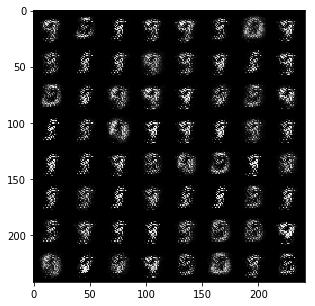

 30%|██▉       | 2999/10000 [03:22<07:53, 14.80it/s]

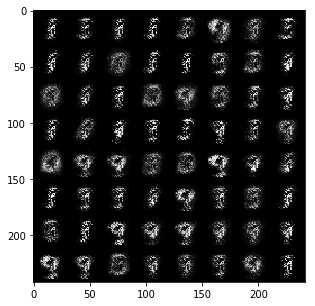

 31%|███       | 3099/10000 [03:28<07:44, 14.87it/s]

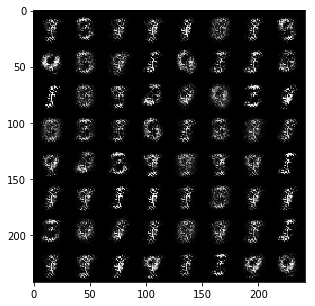

 32%|███▏      | 3198/10000 [03:34<07:35, 14.94it/s]

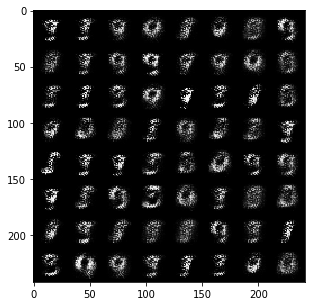

 33%|███▎      | 3300/10000 [03:39<07:26, 15.01it/s]

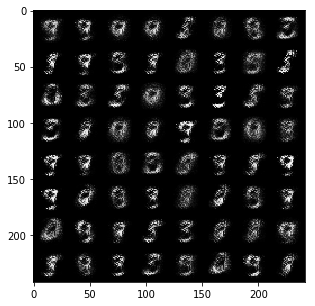

 34%|███▍      | 3398/10000 [03:45<07:17, 15.09it/s]

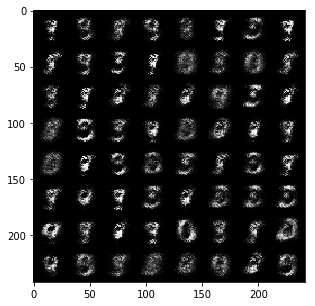

 35%|███▍      | 3499/10000 [03:50<07:09, 15.15it/s]

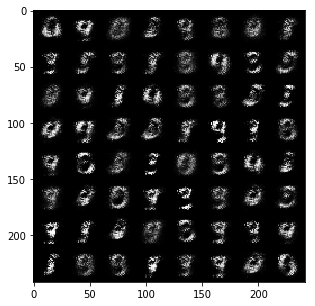

 36%|███▌      | 3600/10000 [03:56<07:00, 15.23it/s]

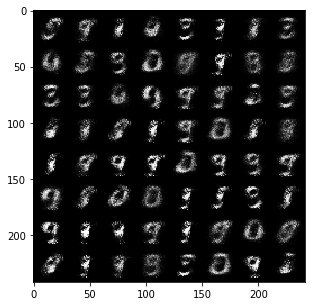

 37%|███▋      | 3699/10000 [04:03<06:54, 15.22it/s]

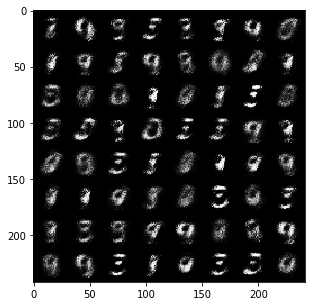

 38%|███▊      | 3800/10000 [04:09<06:46, 15.25it/s]

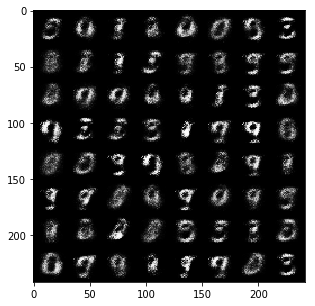

 39%|███▉      | 3899/10000 [04:15<06:39, 15.25it/s]

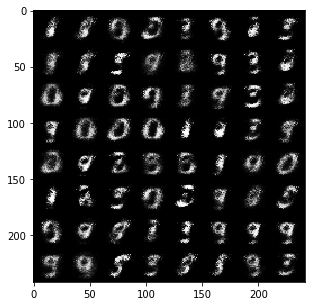

 40%|███▉      | 3999/10000 [04:23<06:34, 15.21it/s]

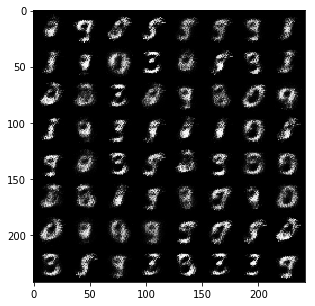

 41%|████      | 4099/10000 [04:29<06:28, 15.20it/s]

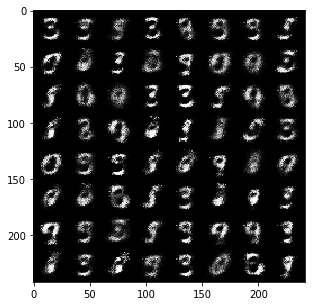

 42%|████▏     | 4200/10000 [04:40<06:26, 15.00it/s]

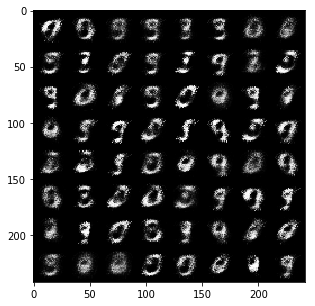

 43%|████▎     | 4300/10000 [04:46<06:20, 15.00it/s]

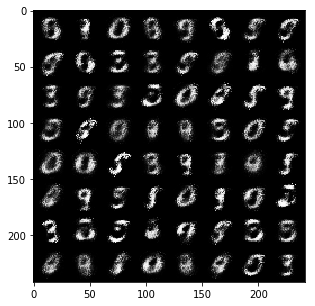

 44%|████▍     | 4400/10000 [04:52<06:12, 15.02it/s]

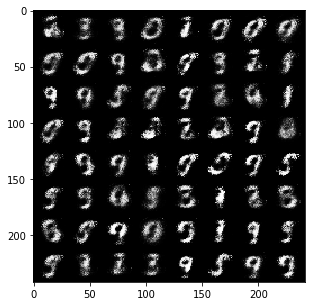

 45%|████▍     | 4499/10000 [04:58<06:05, 15.05it/s]

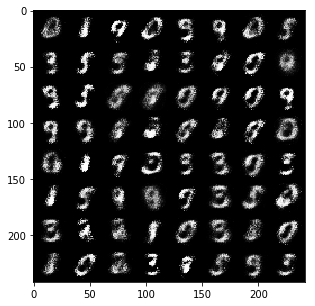

 46%|████▌     | 4599/10000 [05:04<05:57, 15.11it/s]

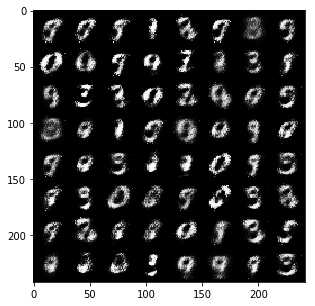

 47%|████▋     | 4699/10000 [05:11<05:51, 15.09it/s]

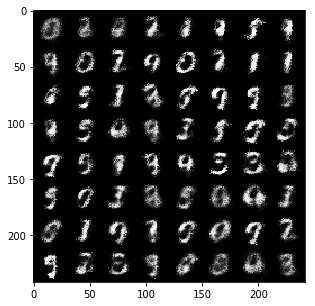

 48%|████▊     | 4798/10000 [05:17<05:43, 15.12it/s]

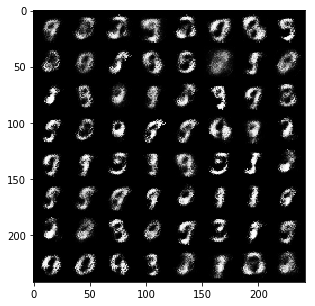

 49%|████▉     | 4900/10000 [05:23<05:36, 15.16it/s]

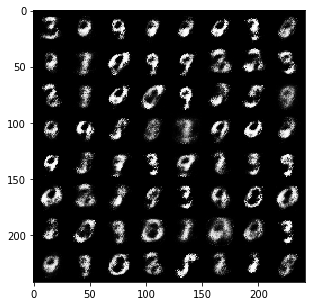

 50%|█████     | 5000/10000 [05:29<05:29, 15.18it/s]

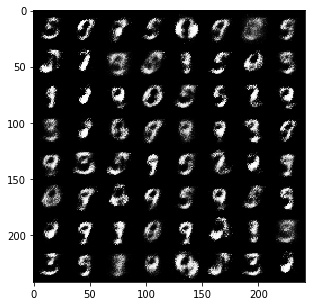

 51%|█████     | 5100/10000 [05:36<05:23, 15.15it/s]

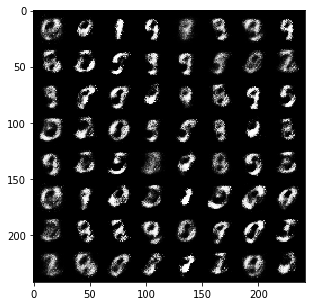

 52%|█████▏    | 5199/10000 [05:44<05:18, 15.08it/s]

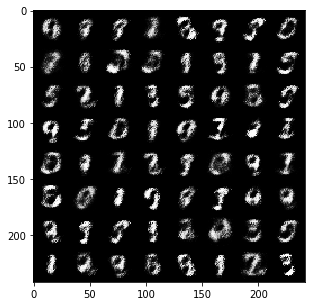

 53%|█████▎    | 5300/10000 [05:50<05:11, 15.10it/s]

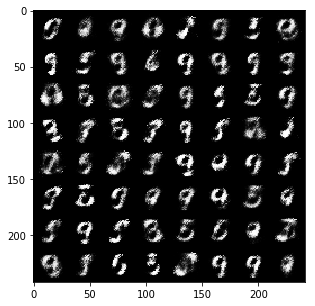

 54%|█████▍    | 5400/10000 [05:56<05:03, 15.15it/s]

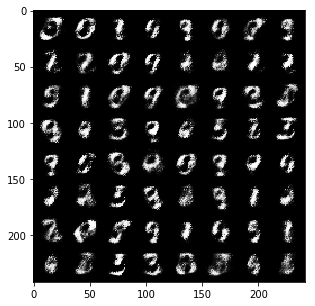

 55%|█████▍    | 5499/10000 [06:02<04:56, 15.18it/s]

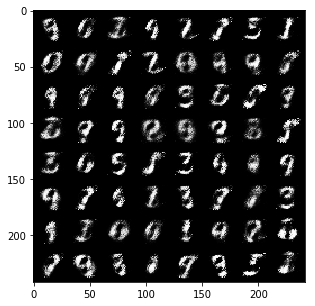

 56%|█████▌    | 5598/10000 [06:08<04:49, 15.20it/s]

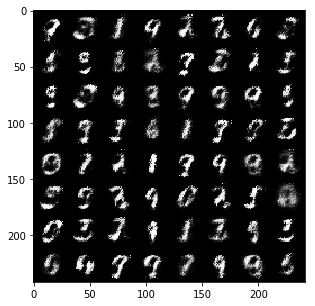

 57%|█████▋    | 5700/10000 [06:15<04:43, 15.16it/s]

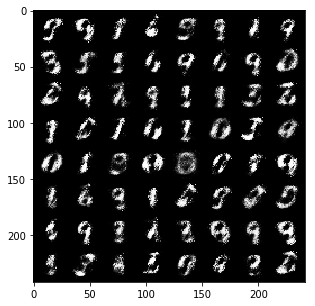

 58%|█████▊    | 5800/10000 [06:21<04:36, 15.19it/s]

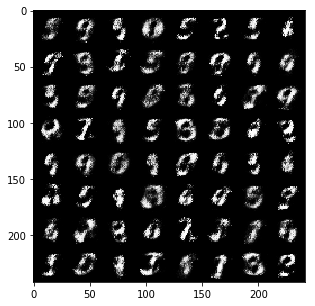

 59%|█████▉    | 5899/10000 [06:27<04:29, 15.22it/s]

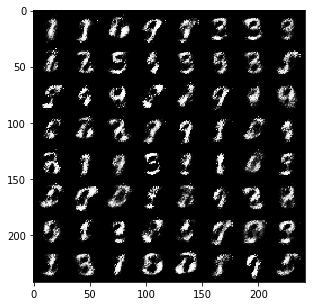

 60%|█████▉    | 5999/10000 [06:34<04:22, 15.22it/s]

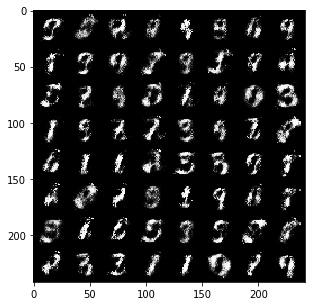

 61%|██████    | 6100/10000 [06:40<04:16, 15.23it/s]

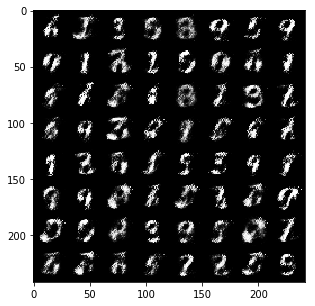

 62%|██████▏   | 6198/10000 [06:46<04:09, 15.24it/s]

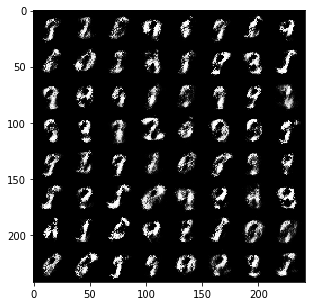

 63%|██████▎   | 6298/10000 [06:52<04:02, 15.26it/s]

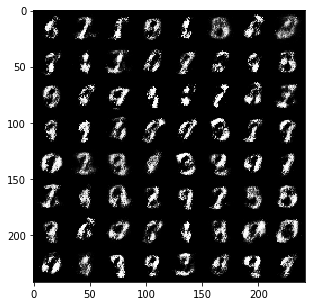

 64%|██████▍   | 6400/10000 [06:59<03:56, 15.25it/s]

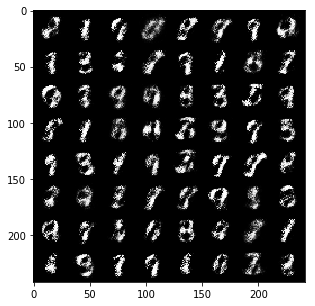

 65%|██████▍   | 6499/10000 [07:06<03:49, 15.24it/s]

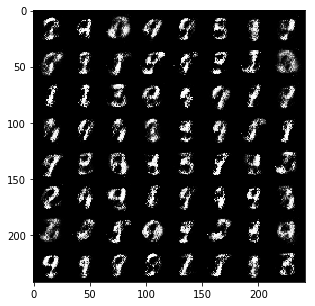

 66%|██████▌   | 6600/10000 [07:12<03:43, 15.25it/s]

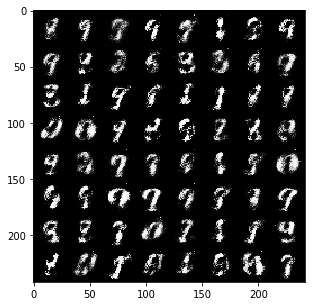

 67%|██████▋   | 6698/10000 [07:19<03:36, 15.23it/s]

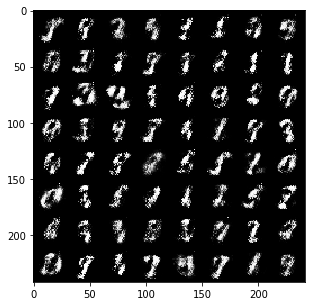

 68%|██████▊   | 6799/10000 [07:25<03:29, 15.25it/s]

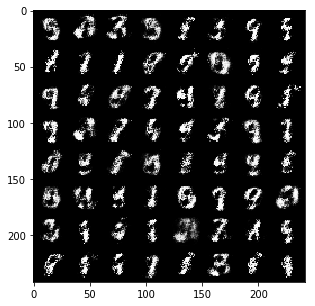

 69%|██████▉   | 6899/10000 [07:31<03:22, 15.28it/s]

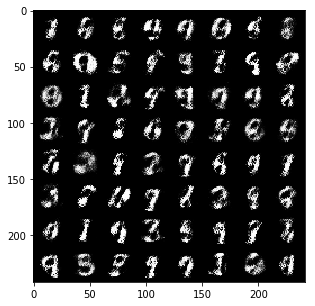

 70%|███████   | 7000/10000 [07:37<03:16, 15.31it/s]

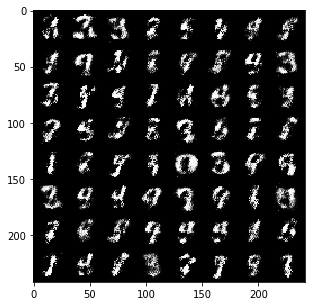

 71%|███████   | 7099/10000 [07:44<03:09, 15.30it/s]

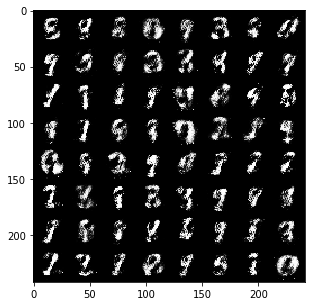

 72%|███████▏  | 7198/10000 [07:49<03:02, 15.33it/s]

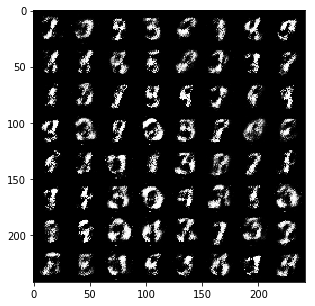

 73%|███████▎  | 7299/10000 [07:55<02:56, 15.33it/s]

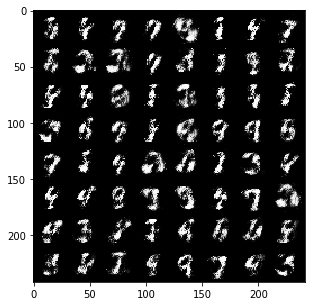

 74%|███████▍  | 7398/10000 [08:02<02:49, 15.32it/s]

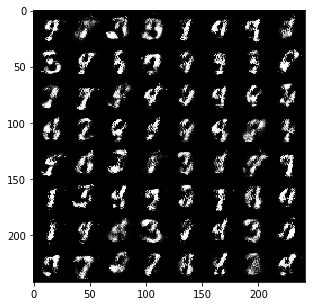

 75%|███████▌  | 7500/10000 [08:10<02:43, 15.29it/s]

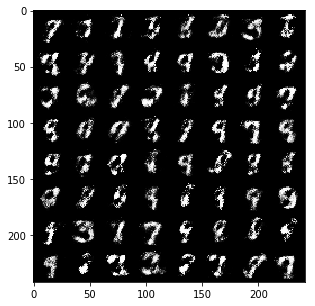

 76%|███████▌  | 7599/10000 [08:16<02:36, 15.29it/s]

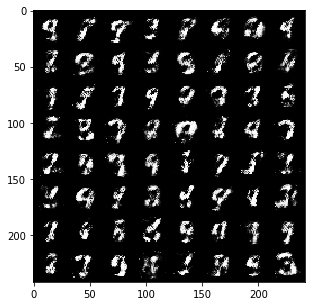

 77%|███████▋  | 7698/10000 [08:21<02:30, 15.34it/s]

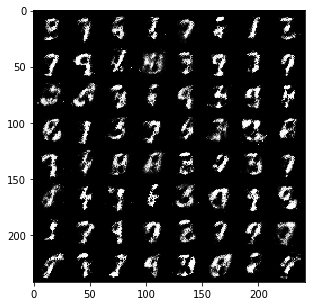

 78%|███████▊  | 7798/10000 [08:27<02:23, 15.37it/s]

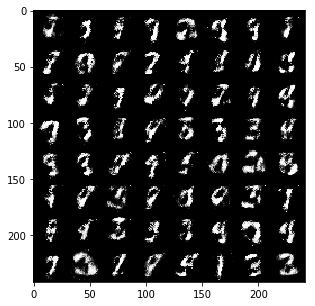

 79%|███████▉  | 7900/10000 [08:33<02:16, 15.37it/s]

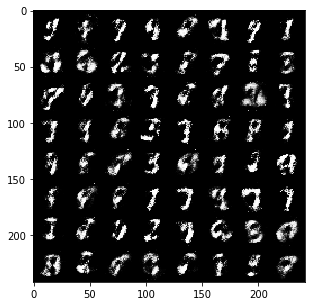

 80%|████████  | 8000/10000 [08:40<02:10, 15.38it/s]

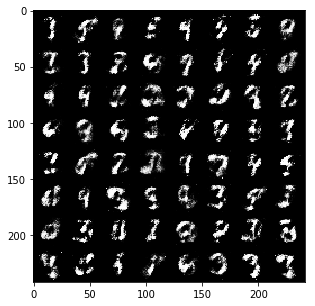

 81%|████████  | 8100/10000 [08:46<02:03, 15.39it/s]

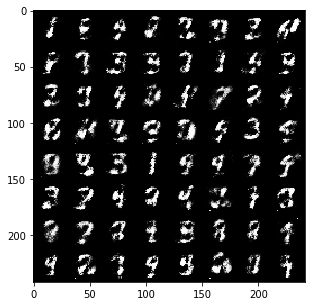

 82%|████████▏ | 8198/10000 [08:52<01:57, 15.40it/s]

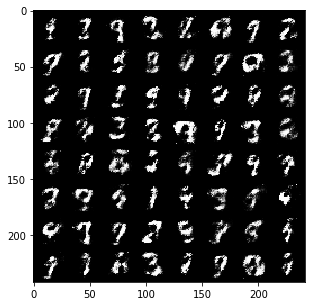

 83%|████████▎ | 8300/10000 [08:59<01:50, 15.38it/s]

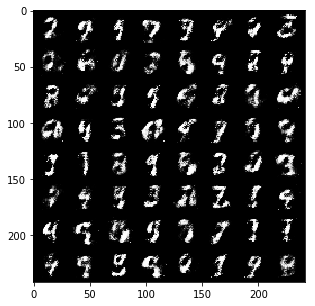

 84%|████████▍ | 8399/10000 [09:05<01:44, 15.39it/s]

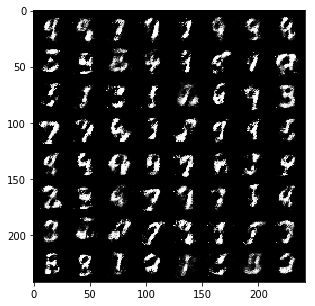

 85%|████████▌ | 8500/10000 [09:12<01:37, 15.38it/s]

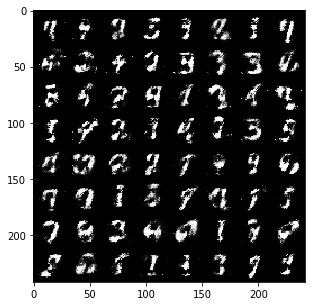

 86%|████████▌ | 8600/10000 [09:19<01:31, 15.37it/s]

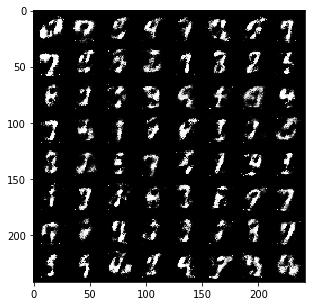

 87%|████████▋ | 8700/10000 [09:26<01:24, 15.36it/s]

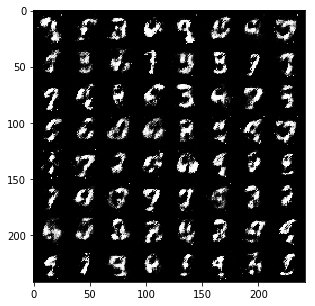

 88%|████████▊ | 8799/10000 [09:32<01:18, 15.38it/s]

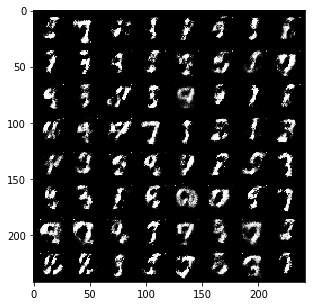

 89%|████████▉ | 8900/10000 [09:38<01:11, 15.37it/s]

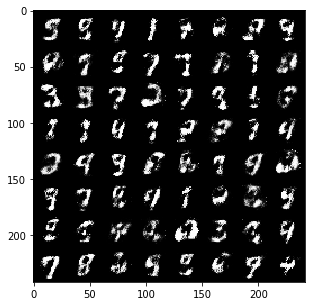

 90%|█████████ | 9000/10000 [09:45<01:05, 15.37it/s]

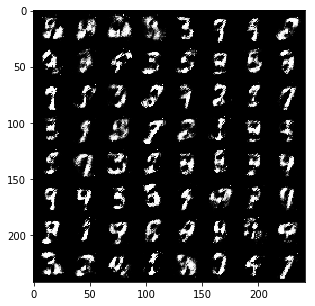

 91%|█████████ | 9099/10000 [09:51<00:58, 15.37it/s]

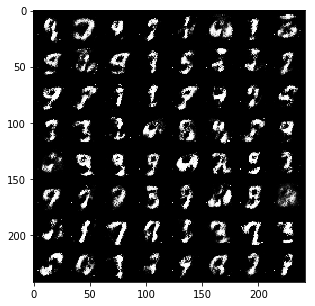

 92%|█████████▏| 9199/10000 [09:59<00:52, 15.34it/s]

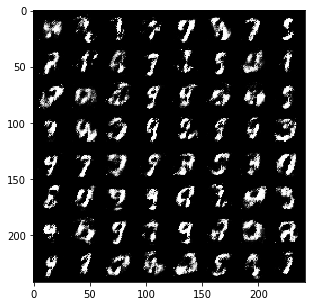

 93%|█████████▎| 9300/10000 [10:05<00:45, 15.35it/s]

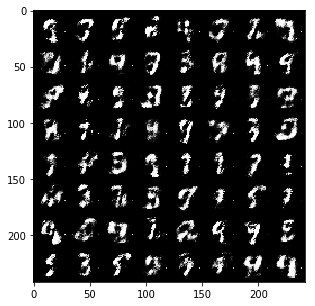

 94%|█████████▍| 9400/10000 [10:11<00:39, 15.37it/s]

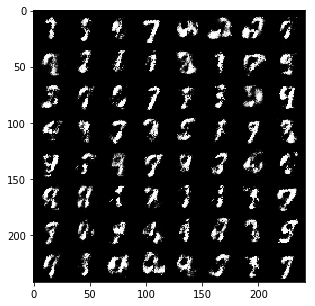

 95%|█████████▌| 9500/10000 [10:18<00:32, 15.37it/s]

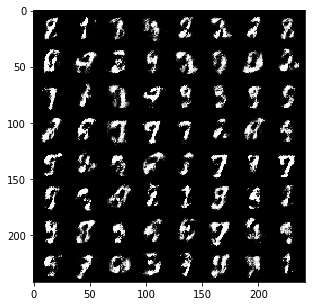

 96%|█████████▌| 9600/10000 [10:26<00:26, 15.33it/s]

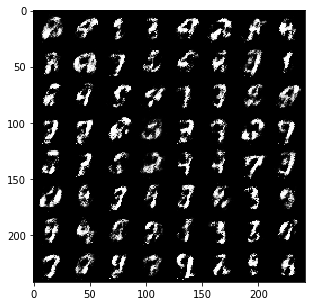

 97%|█████████▋| 9698/10000 [10:32<00:19, 15.34it/s]

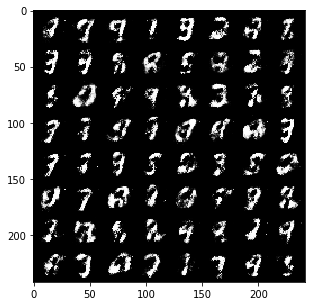

 98%|█████████▊| 9799/10000 [10:38<00:13, 15.35it/s]

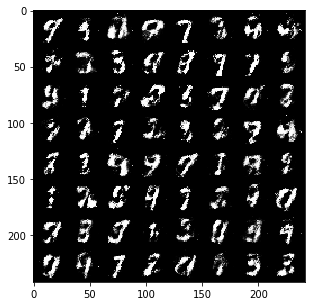

 99%|█████████▉| 9898/10000 [10:44<00:06, 15.37it/s]

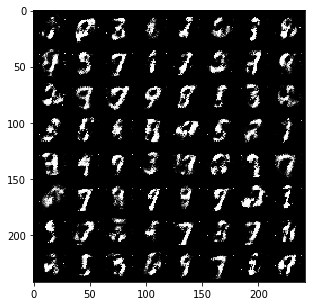

100%|██████████| 10000/10000 [10:49<00:00, 15.40it/s]


In [10]:
from tqdm import tqdm
G = Generator()
D = Discriminator()
G_lr = D_lr = 0.0002
optimizers = {
    'D': torch.optim.Adam(D.parameters(), lr=D_lr),
    'G': torch.optim.Adam(G.parameters(), lr=G_lr)
}
criterion = nn.BCELoss()
for epoch in tqdm(range(10000)):
    data=next(iter(train_loader))[0]
    ones_label = Variable(torch.ones(data.size()[0]))
    zeros_label = Variable(torch.zeros(data.size()[0]))

    optimizers['D'].zero_grad()
    data = Variable(data)
    output_real = D(data)
    loss_real = criterion(output_real, ones_label)
    loss_real.backward()

    noisev = torch.randn(data.size()[0], z_size, 1, 1)
    noisev = Variable(noisev)
    fake_data = G(noisev)
    output_fake = D(fake_data)
    loss_fake = criterion(output_fake, zeros_label)
    loss_fake.backward()
    optimizers['D'].step()

    optimizers['G'].zero_grad()
    noisev = torch.randn(data.size()[0], z_size, 1, 1)
    noisev = Variable(noisev)
    fake_data = G(noisev)
    output_fake1 = D(fake_data)
    loss_fake1 = criterion(output_fake1, ones_label)
    loss_fake1.backward()
    optimizers['G'].step()

    if epoch % 100 == 0:
        dd = utils.make_grid(fake_data.data[:64])
        imshow(dd)